# Developing resize Function

(384, 384)

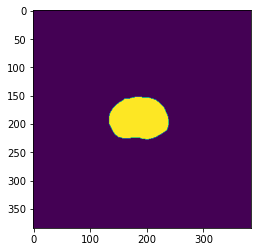

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imsave, imread
path = 'C:/Users/batuc/Desktop/SpecialProblem/data4/test/296_5_12_mask.tiff'
im = cv2.imread(path, 0)
plt.imshow(im) #, cmap='gray'
im.shape

## Resize

In [3]:
def resize_image(img, size=(28,28)):

    h, w = img.shape[:2]
    c = img.shape[2] if len(img.shape)>2 else 1

    if h == w: 
        return cv2.resize(img, size, cv2.INTER_AREA)

    dif = h if h > w else w

    interpolation = cv2.INTER_AREA if dif > (size[0]+size[1])//2 else cv2.INTER_CUBIC

    x_pos = (dif - w)//2
    y_pos = (dif - h)//2

    if len(img.shape) == 2:
        mask = np.zeros((dif, dif), dtype=img.dtype)
        mask[y_pos:y_pos+h, x_pos:x_pos+w] = img[:h, :w]
    else:
        mask = np.zeros((dif, dif, c), dtype=img.dtype)
        mask[y_pos:y_pos+h, x_pos:x_pos+w, :] = img[:h, :w, :]


    return cv2.resize(mask, size, interpolation)

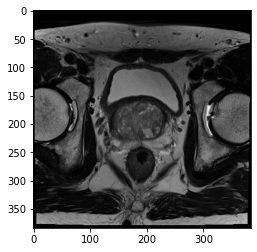

In [4]:
img = imread('C:/Users/batuc/Desktop/SpecialProblem/data/train/102_5_10.tiff', as_gray=True)
img.shape
plt.imshow(img, cmap='gray')

In [5]:
img.shape

(384, 384)

In [6]:
img = resize_image(img, (320,320))

In [7]:
img.shape

(320, 320)

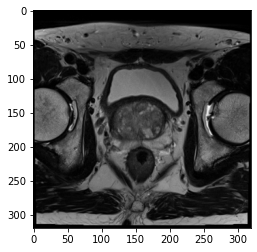

In [9]:
plt.imshow(img, cmap='gray')

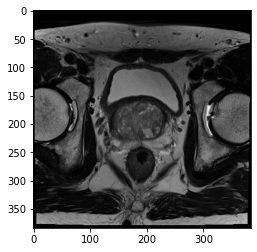

In [11]:
img = imread('C:/Users/batuc/Desktop/SpecialProblem/data/train/102_5_10.tiff', as_gray=True)
plt.imshow(img, cmap='gray')

In [12]:
img.shape

(384, 384)

In [13]:
img.resize(320,320)
img.shape

(320, 320)

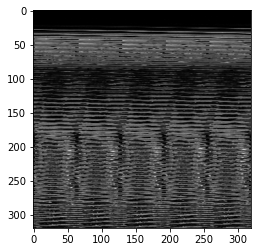

In [14]:
plt.imshow(img, cmap='gray')

# Showing

In [1]:
# IMPORTS
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imageio
from skimage.io import imsave, imread

In [2]:
def resize_image(img, size=(28,28)):

    h, w = img.shape[:2]
    c = img.shape[2] if len(img.shape)>2 else 1

    if h == w: 
        return cv2.resize(img, size, cv2.INTER_AREA)

    dif = h if h > w else w

    interpolation = cv2.INTER_AREA if dif > (size[0]+size[1])//2 else cv2.INTER_CUBIC

    x_pos = (dif - w)//2
    y_pos = (dif - h)//2

    if len(img.shape) == 2:
        mask = np.zeros((dif, dif), dtype=img.dtype)
        mask[y_pos:y_pos+h, x_pos:x_pos+w] = img[:h, :w]
    else:
        mask = np.zeros((dif, dif, c), dtype=img.dtype)
        mask[y_pos:y_pos+h, x_pos:x_pos+w, :] = img[:h, :w, :]


    return cv2.resize(mask, size, interpolation)

## Prostate

(384, 384)

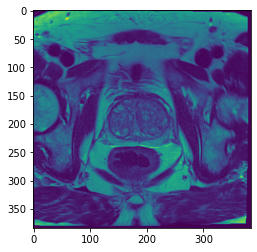

In [3]:
path = 'C:/Users/batuc/Desktop/SpecialProblem/data4/test/296_5_12.tiff'
img2 = imageio.imread('C:/Users/batuc/Desktop/SpecialProblem/data4/test/296_5_12.tiff')
img = cv2.imread(path, 0)
plt.imshow(img) #, cmap='gray'
img.shape

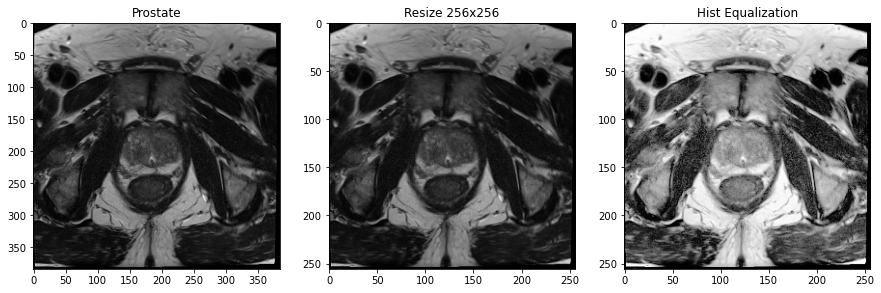

In [11]:
img1 = cv2.imread('C:/Users/batuc/Desktop/SpecialProblem/data4/test/296_5_16.tiff')
img2 = cv2.imread('C:/Users/batuc/Desktop/SpecialProblem/data4/test/296_5_16.tiff')
#resize
img2 = resize_image(img2, (256, 256))
#histogram equalization
hist, bins = np.histogram(img2.flatten(), 256, [0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')
img3 = cdf[img2]
# show results
fig, axes = plt.subplots(1,3, figsize=(15,5), sharex=False, sharey=False)
axes[0].imshow(img1, cmap='gray')
axes[0].set_title("Prostate")
axes[1].imshow(img2)
axes[1].set_title("Resize 256x256")
axes[2].imshow(img3)
axes[2].set_title("Hist Equalization")
for i,ax in enumerate(axes.T.flatten()):
    ax.axis('on')

## Mask

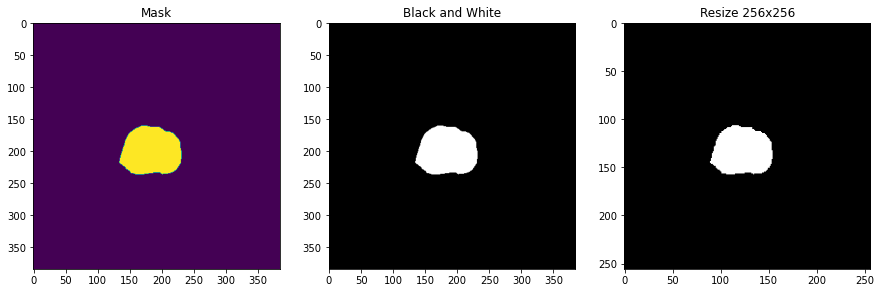

In [23]:
img1 = imageio.imread('C:/Users/batuc/Desktop/SpecialProblem/data4/test/296_5_16_mask.tiff')
img2 = cv2.imread('C:/Users/batuc/Desktop/SpecialProblem/data4/test/296_5_16_mask.tiff')
#resize
img2 = resize_image(img1, (256, 256))

# show results
fig, axes = plt.subplots(1,3, figsize=(15,5), sharex=False, sharey=False)
axes[0].imshow(img1)
axes[0].set_title("Mask")
axes[1].imshow(img1, cmap='gray')
axes[1].set_title("Black and White")
axes[2].imshow(img2, cmap='gray')
axes[2].set_title("Resize 256x256")
for i,ax in enumerate(axes.T.flatten()):
    ax.axis('on')

## Predictions

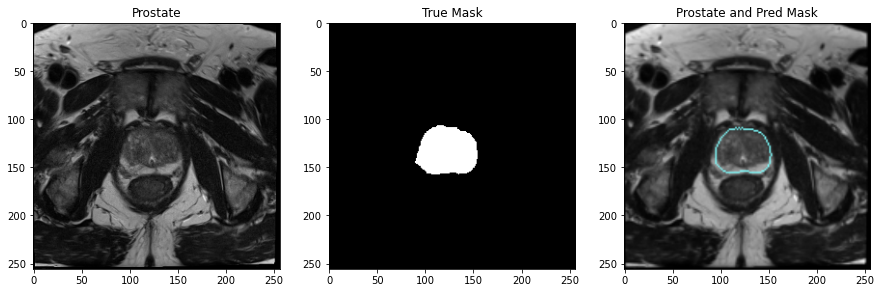

In [34]:
img1 = cv2.imread('C:/Users/batuc/Desktop/SpecialProblem/data4/test/296_5_16.tiff')
img2 = imageio.imread('C:/Users/batuc/Desktop/SpecialProblem/data4/test/296_5_16_mask.tiff')
img3 = cv2.imread('C:/Users/batuc/Desktop/SpecialProblem/data4/preds/4_pred.png')
#resize
img1 = resize_image(img1, (256, 256))
img2 = resize_image(img2, (256, 256))
img3 = resize_image(img3, (256, 256))
# show results
fig, axes = plt.subplots(1,3, figsize=(15,5), sharex=False, sharey=False)
axes[0].imshow(img1, cmap='gray')
axes[0].set_title("Prostate")
axes[1].imshow(img2, cmap='gray')
axes[1].set_title("True Mask")
axes[2].imshow(img3)
axes[2].set_title("Prostate and Pred Mask")
for i,ax in enumerate(axes.T.flatten()):
    ax.axis('on')